# RNN and LSTM with TF2.0

## 라이브러리 불러오기

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

## 간단한 모델 만들기 (with Sequential() )


In [2]:
# Sequential 정의
model = tf.keras.Sequential()
# 단어는 1000개, 노드의 크기(출력 차원)은 64로
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# 128개의 노드로 구성된 LSTM 생성.
model.add(layers.LSTM(128))

# 마지막 레이어는 10개의 클래스로 출력. softmax classfier를 지난다.
model.add(layers.Dense(10, activation='softmax'))

# 모델 설명을 출력한다.
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          64000     
_________________________________________________________________
lstm (LSTM)                  (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


## MNIST 불러오기 

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
sample, sample_label = x_train[0], y_train[0]

## 발전된 모델로 MNIST 분류기 만들기 

In [4]:
# hyperparameter 세팅
batch_size = 64
input_dim = 28
units = 64
output_size = 10 

In [5]:
# model 정의
model = tf.keras.models.Sequential([
          tf.keras.layers.LSTM(units, input_shape=(None, input_dim)),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(output_size, activation='softmax')])
    
# model compile, multiclass-classification을 할 때 loss는 무엇일까?
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [6]:
# 모델 실행.
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=5)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 56s 941us/sample - loss: 1.0721 - acc: 0.6578 - val_loss: 0.6631 - val_acc: 0.7776
Epoch 2/5
60000/60000 [==============================] - 56s 936us/sample - loss: 0.4507 - acc: 0.8645 - val_loss: 0.3532 - val_acc: 0.8851
Epoch 3/5
60000/60000 [==============================] - 56s 932us/sample - loss: 0.2835 - acc: 0.9133 - val_loss: 0.2194 - val_acc: 0.9330
Epoch 4/5
60000/60000 [==============================] - 57s 943us/sample - loss: 0.2251 - acc: 0.9318 - val_loss: 0.1851 - val_acc: 0.9439
Epoch 5/5
60000/60000 [==============================] - 56s 940us/sample - loss: 0.1908 - acc: 0.9420 - val_loss: 0.1795 - val_acc: 0.9438


In [7]:
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("Test Score: ", score)
print("Test Accuracy: ", acc)

10000/10000 [==============================] - 3s 297us/sample - loss: 0.1795 - acc: 0.9438
Test Score:  0.17949609065055847
Test Accuracy:  0.9438


## loss value 시각화 

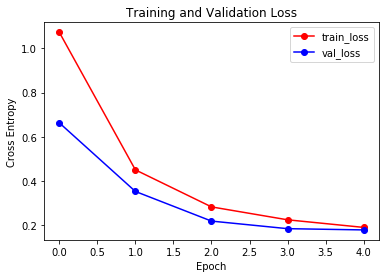

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-', label="train_loss")
plt.plot(val_loss, 'bo-', label="val_loss")
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.legend(loc="best")
plt.title('Training and Validation Loss')
plt.show()